# Assignment


You have already picked out the dataset you want to work with. 

----

# Question 
1. EDA, i want to see some insights, present it neatly. 
2. Fit a Decision Tree Regressor model on your data. 
3. I want to see the training and testing accuracy of your model. So do split your data before modelling.


### Brownie Points (Extra 15 points)
- Lastly, i want to see a function where i can input my values and get a prediction of whatever you are trying to predict. Think this through !!.



Best of luck !!

![](https://media.tenor.com/mUVjXo5LhsQAAAAC/kakashi-yes.gif)


In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
import math
import joblib
from joblib import load

In [109]:
df = pd.read_csv('laptop_data.csv')

In [110]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [112]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [113]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [114]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [115]:
df.duplicated().sum()

0

In [116]:
catvars = df.select_dtypes(include=['object']).columns
numvars = df.select_dtypes(include = ['int32','int64','float32','float64']).columns

catvars,numvars

(Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory',
        'Gpu', 'OpSys', 'Weight'],
       dtype='object'),
 Index(['Unnamed: 0', 'Inches', 'Price'], dtype='object'))

In [117]:
def uniquevals(col):
    print(f'Details of the particular col {col} is : {df[col].unique()}')
    
def valuecounts(col):
    print(f'Valuecounts of the particular col {col} is : {df[col].value_counts()}')
    
    
    
    
for col in df.columns:
    uniquevals(col)
    print("-"*75)

Details of the particular col Unnamed: 0 is : [   0    1    2 ... 1300 1301 1302]
---------------------------------------------------------------------------
Details of the particular col Company is : ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
---------------------------------------------------------------------------
Details of the particular col TypeName is : ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
---------------------------------------------------------------------------
Details of the particular col Inches is : [13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]
---------------------------------------------------------------------------
Details of the particular col ScreenResolution is : ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 288

In [118]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [119]:
df['Ram'] = df['Ram'].astype('int32')

In [120]:
df['Weight'] = df['Weight'].astype('float32')

In [121]:
df = df.drop('Unnamed: 0', axis =1)

# Exploratory Data Analysis

<Axes: xlabel='Price', ylabel='Density'>

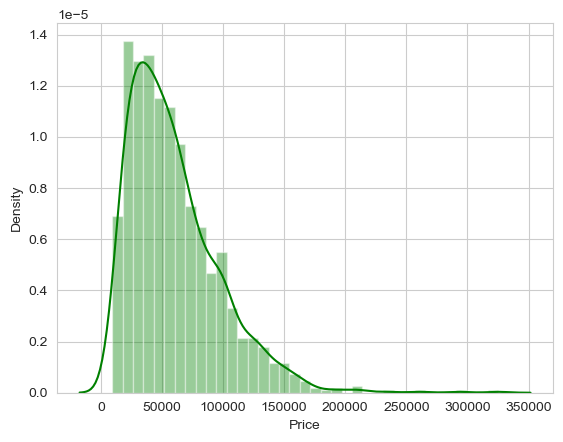

In [122]:
sns.distplot(df['Price'],color='green')

The majority of laptops in the dataset cost between 50000 and 100000, with a small number of outliers above 200000.

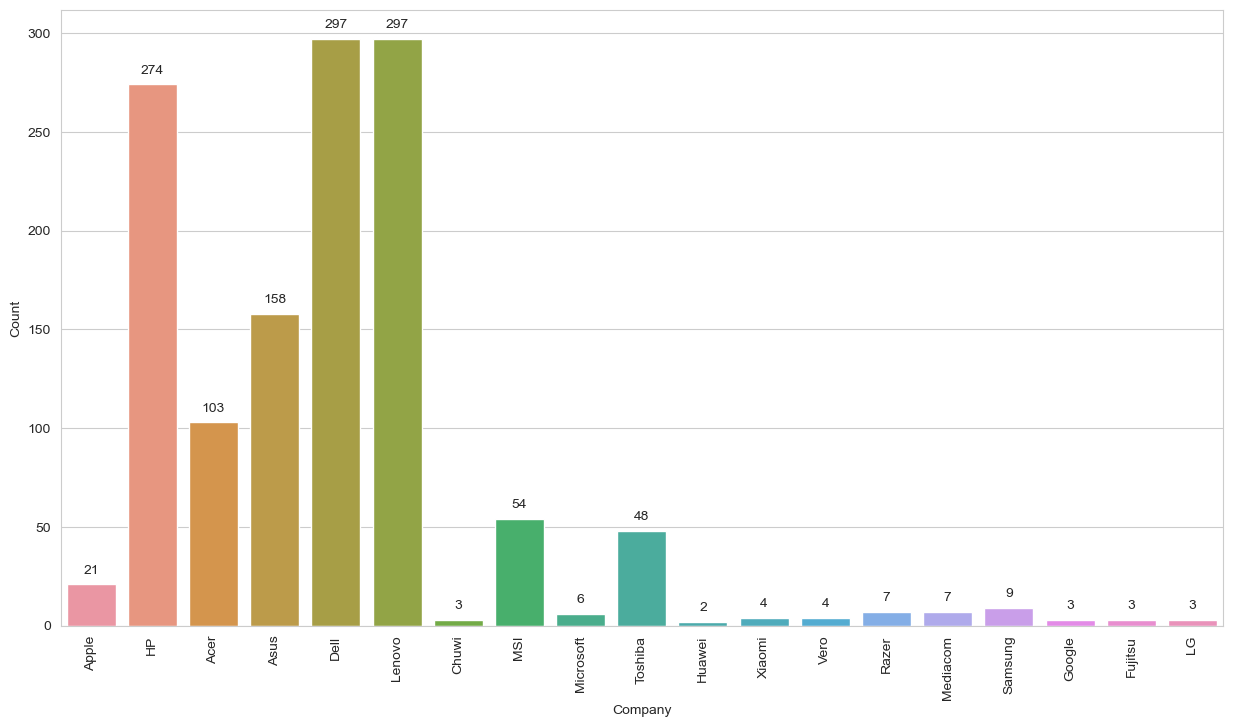

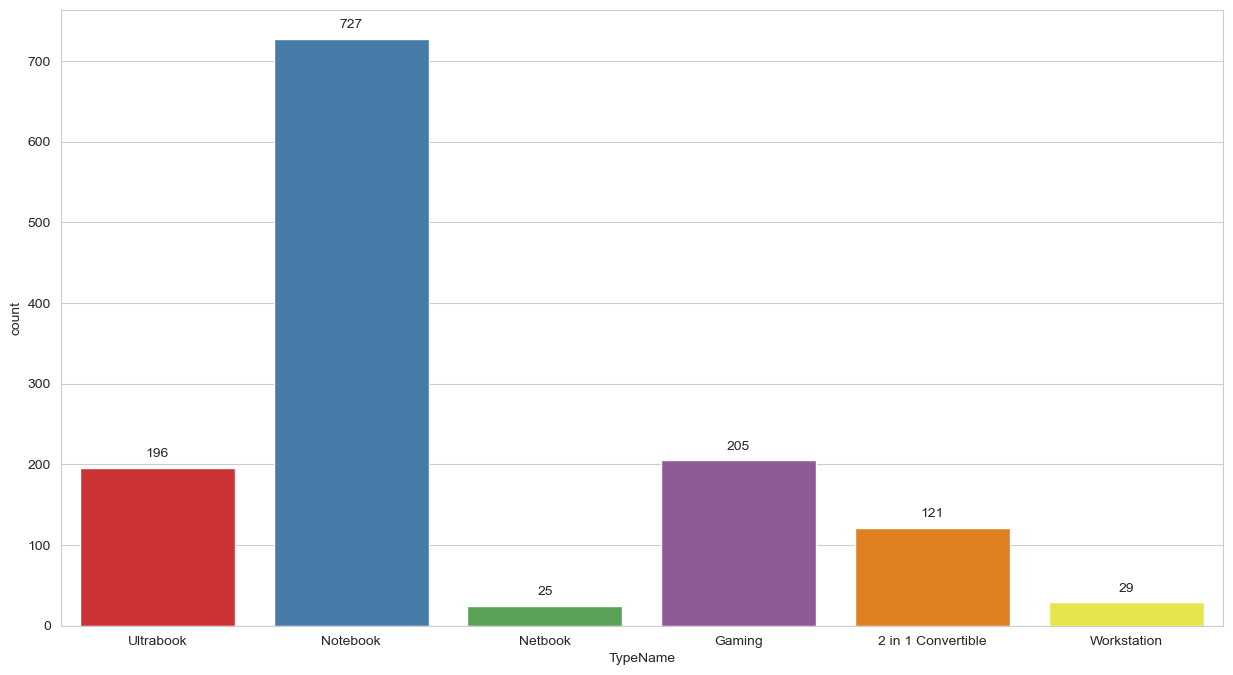

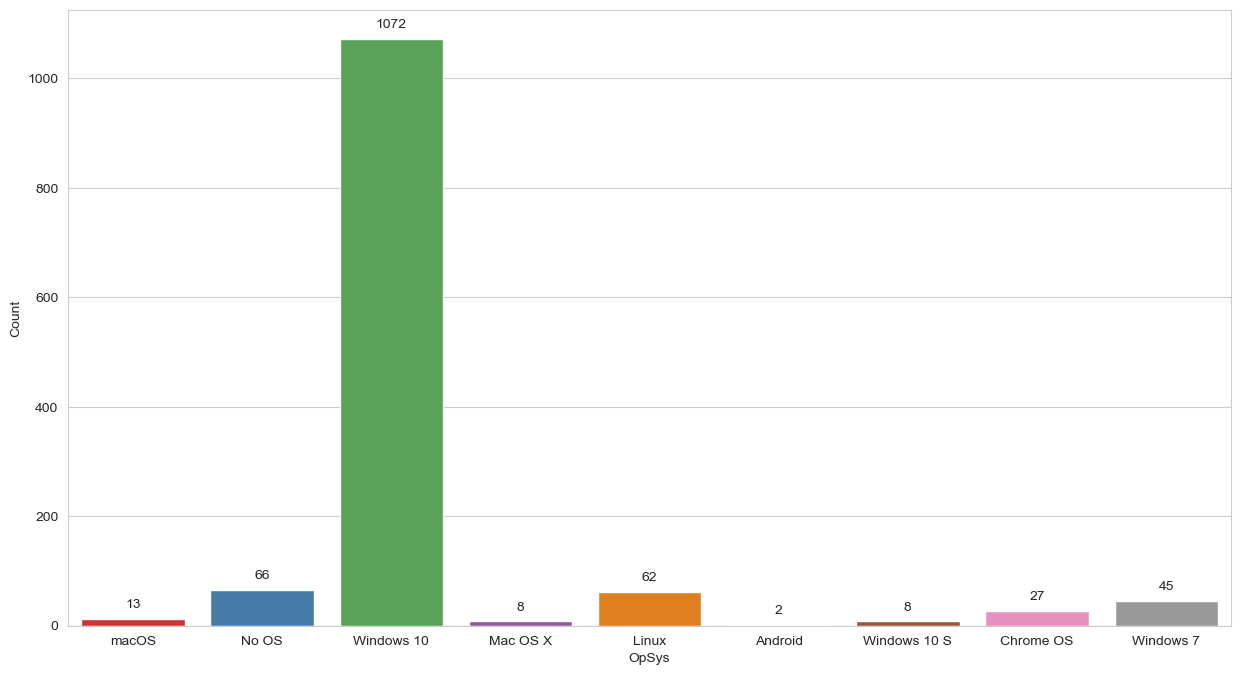

In [123]:
sns.set_palette("Set1")
plt.figure(figsize=(15,8))
plt.xticks(rotation='vertical')
ax = sns.countplot(x="Company", data=df)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_xlabel("Company")
ax.set_ylabel("Count")
plt.show()
plt.figure(figsize=(15,8))
ax = sns.countplot(x="TypeName", data=df)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')
plt.show()
plt.figure(figsize=(15,8))

ax.set_xlabel("TypeName")
ax.set_ylabel("Count")
ax = sns.countplot(x="OpSys", data=df)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_xlabel("OpSys")
ax.set_ylabel("Count")
plt.show()

1. Lenovo and Dell has had a neck to neck competition in view of consumers followed by HP. These laptop companies are providing laptops with good specs and in budget of consumers. Price visulaization will be shown in upcoming charts
2. Notebook type laptop are most sold on matter which brand it of followed by ultrabook and gaming laptop
3. People are prefering to get Windows 10 OS in their laptops.

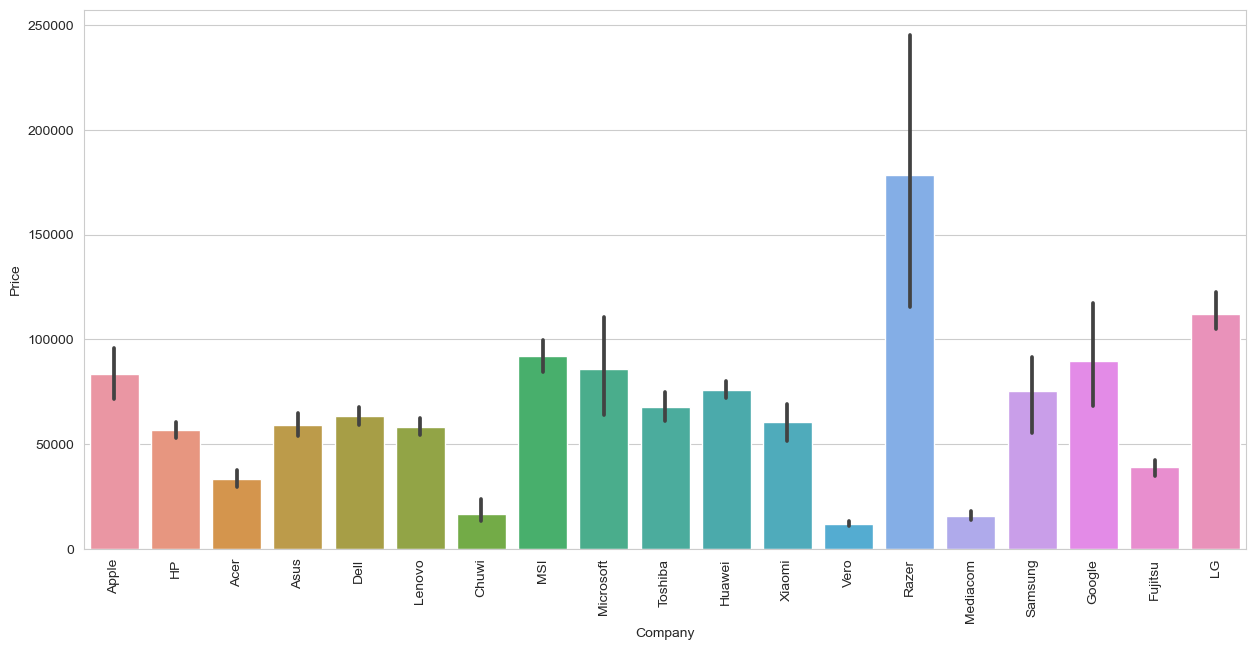

In [124]:
plt.figure(figsize=(15,7))
brand_prices = df.groupby("Company")["Price"].mean().sort_values(ascending=False)
sns.barplot(x = df['Company'],y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

Razer laptops are the most expensive on average, followed by LG and MSI. People who wants cheaper laptops can go for Vero and Chuwi

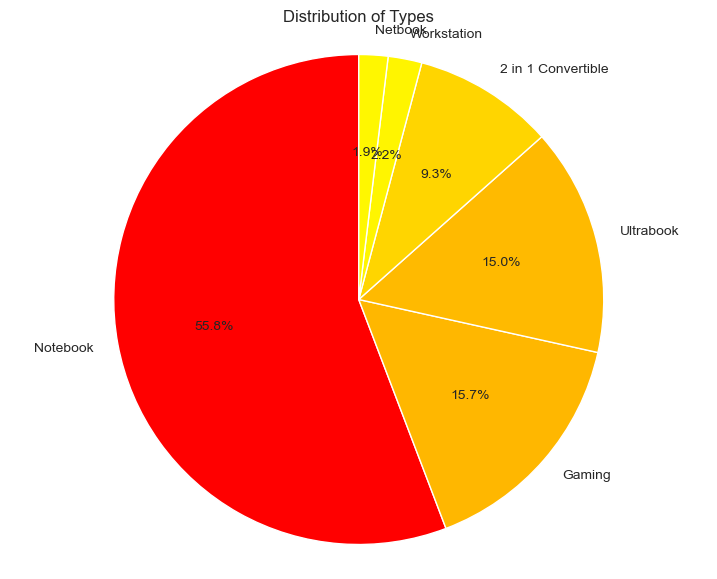

In [125]:
plt.figure(figsize=(9, 7))

counts = df['TypeName'].value_counts()
labels = counts.index
values = counts.values

plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.autumn_r(values/float(max(values))))
plt.axis('equal')
plt.title('Distribution of Types')

plt.show()

The majority of laptops sold are Notebook laptops, followed by Gaming and Ultrabook laptops.. This provides with a hypothesis that people buy notebook type laptop for lightweight property, enough specs to carry out their day to day work.

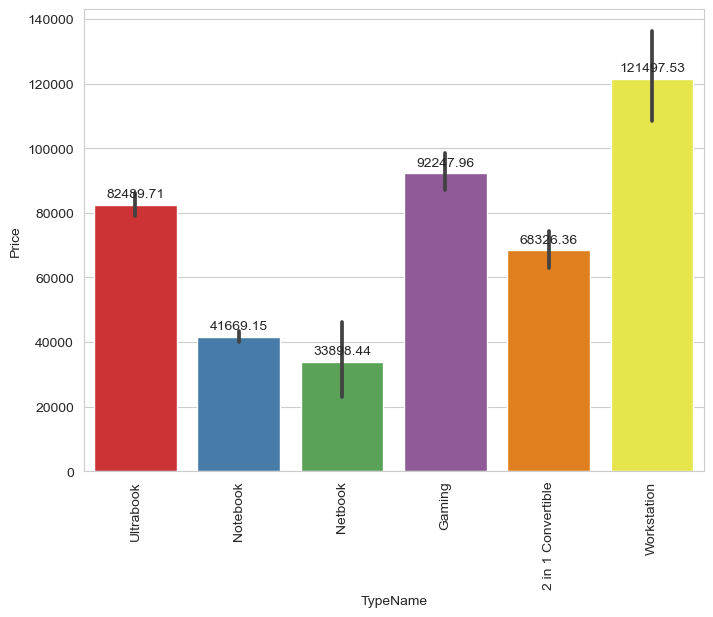

In [126]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))

ax = sns.barplot(x = df['TypeName'], y = df['Price'])
plt.xticks(rotation = 'vertical')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', 
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom')

Workstation laptops are the most expensive laptops among other type of laptop as these laptops have heavy specs and are mostly used for big projects

<Axes: xlabel='Inches', ylabel='Price'>

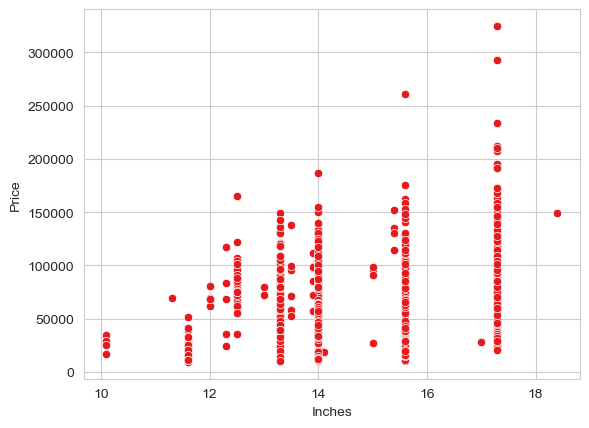

In [127]:
sns.scatterplot(x = df['Inches'],y = df['Price'])

There appears to be a positive correlation between screen size and price, indicating that larger screens are typically more expensive.

In [128]:
df['TouchScreen'] = df['ScreenResolution'].apply(lambda element:1 
                                                      if 'Touchscreen' in element else 0)

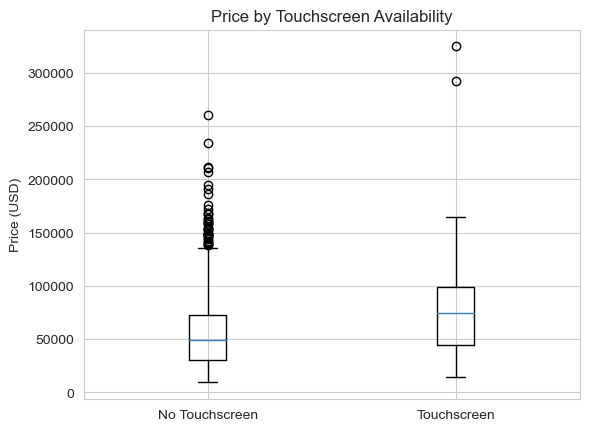

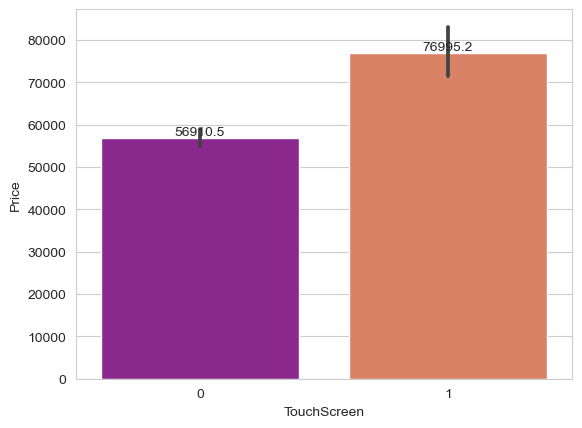

In [129]:
plt.boxplot([df[df["TouchScreen"] == 0]["Price"], df[df["TouchScreen"] == 1]["Price"]], labels=["No Touchscreen", "Touchscreen"])
plt.ylabel("Price (USD)")
plt.title("Price by Touchscreen Availability")
plt.show()

ax = sns.barplot(x=df['TouchScreen'], y=df['Price'], palette='plasma')
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

plt.show()

Laptops with touch screens tend to be slightly more expensive than those without.

In [130]:
df['IPS'] = df['ScreenResolution'].apply(
    lambda element:1 if "IPS" in element else 0)

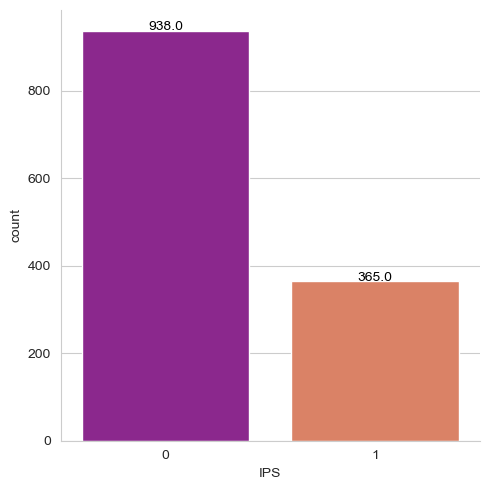

In [131]:
plot = sns.catplot(data=df, x='IPS', kind='count', palette='plasma')

for ax in plot.axes.flat:
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.2,
            height,
            ha='center',
            fontsize=10,
            color='black'
        )

plt.show()

Most of the laptop brands are prefering to sell Screen with IPS panel as customers might tend to go for better resolution

<Axes: >

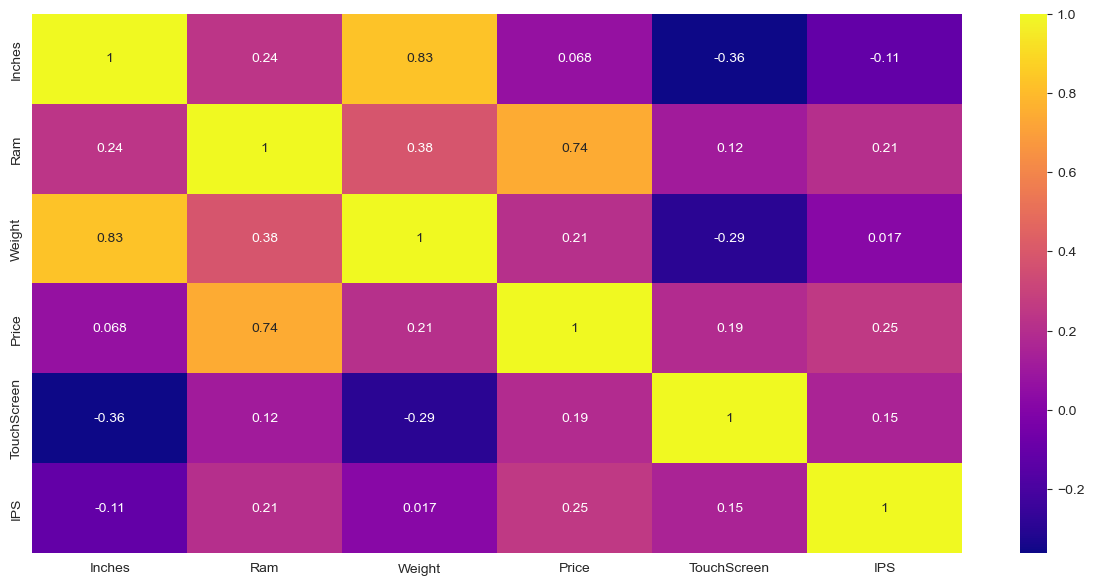

In [132]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap='plasma')

In [133]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


In [134]:
text = ' '.join(df['Company'])
text1 = ' '.join(df['TypeName'])
text2 = ' '.join(df['ScreenResolution'])
text3 = ' '.join(df['Cpu'])
text4 = ' '.join(df['Memory'])
text5 = ' '.join(df['Gpu'])
text6 = ' '.join(df['OpSys'])

In [135]:
stopwords = set(STOPWORDS)

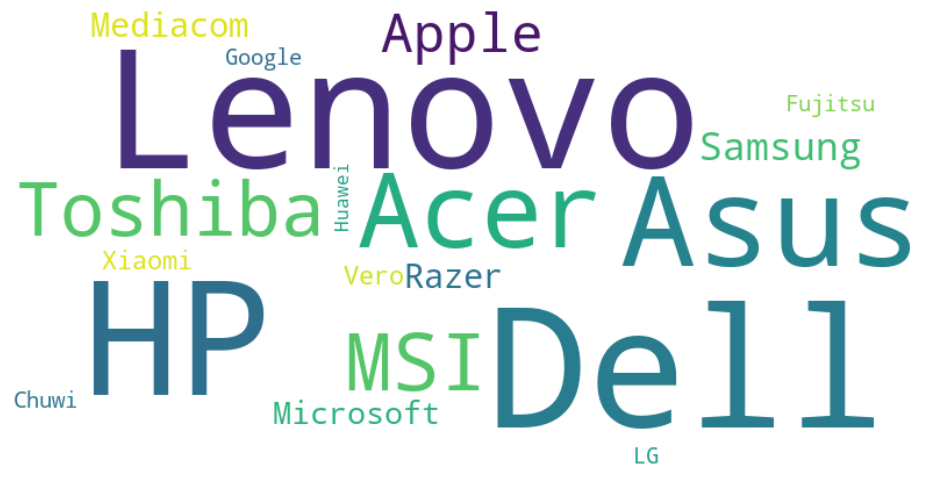

In [136]:
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      stopwords=stopwords, max_words=100, contour_width=3,
                      contour_color='steelblue').generate(text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

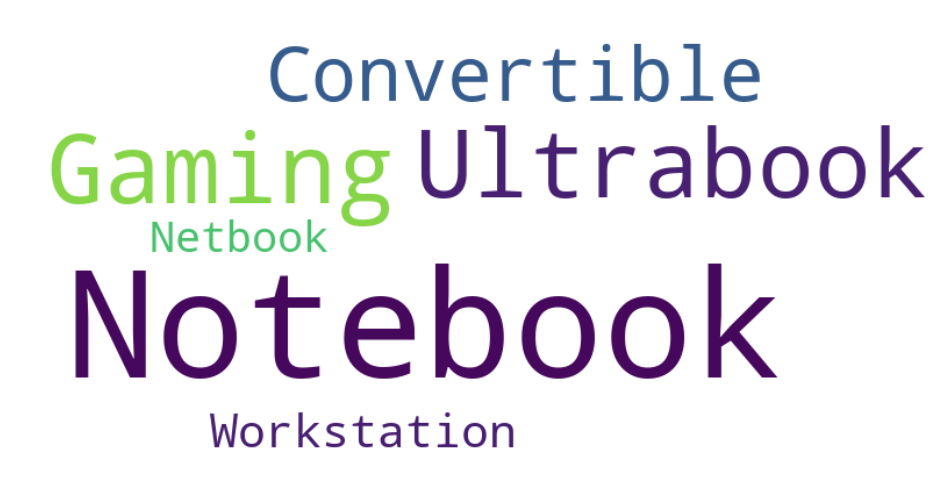

In [137]:
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      stopwords=stopwords, max_words=100, contour_width=3,
                      contour_color='steelblue').generate(text1)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

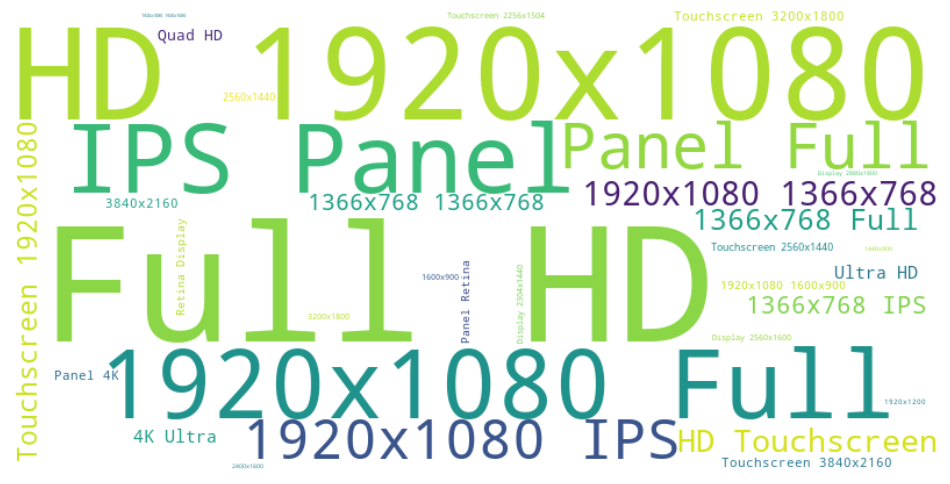

In [138]:
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      stopwords=stopwords, max_words=100, contour_width=3,
                      contour_color='steelblue').generate(text2)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

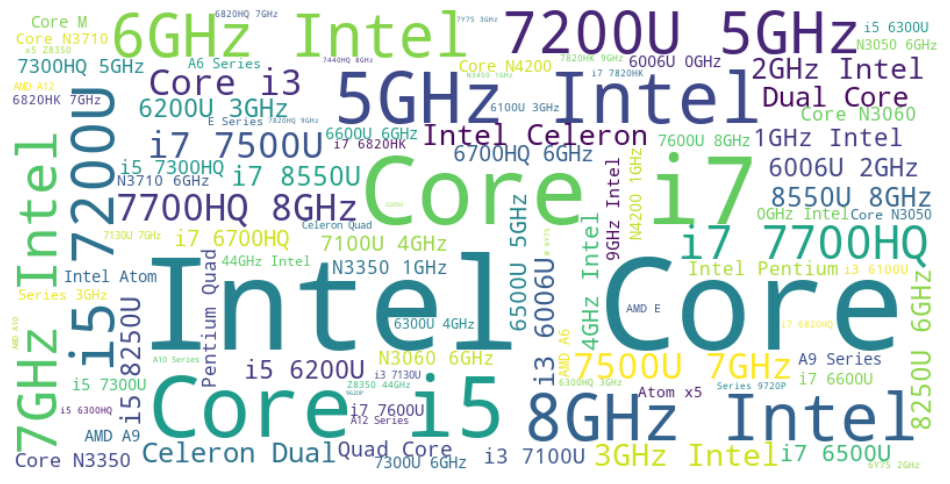

In [139]:
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      stopwords=stopwords, max_words=100, contour_width=3,
                      contour_color='steelblue').generate(text3)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

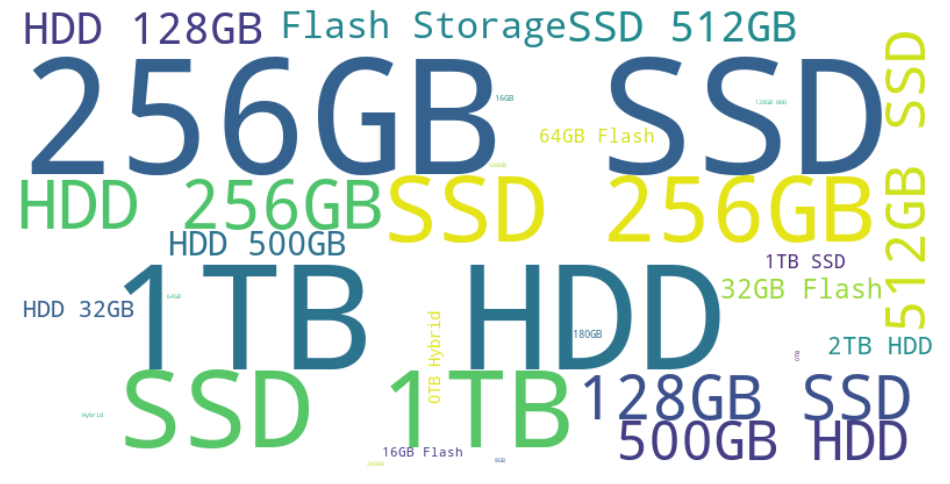

In [140]:
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      stopwords=stopwords, max_words=100, contour_width=3,
                      contour_color='steelblue').generate(text4)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

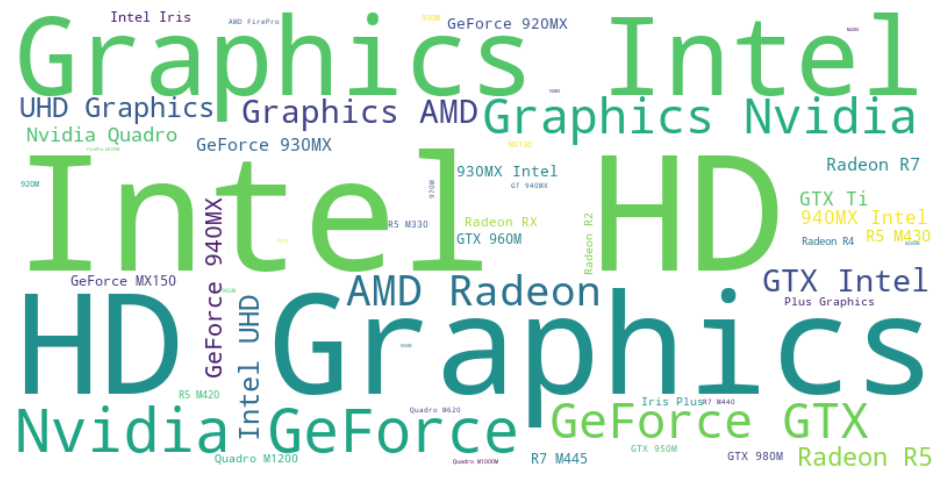

In [141]:
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      stopwords=stopwords, max_words=100, contour_width=3,
                      contour_color='steelblue').generate(text5)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

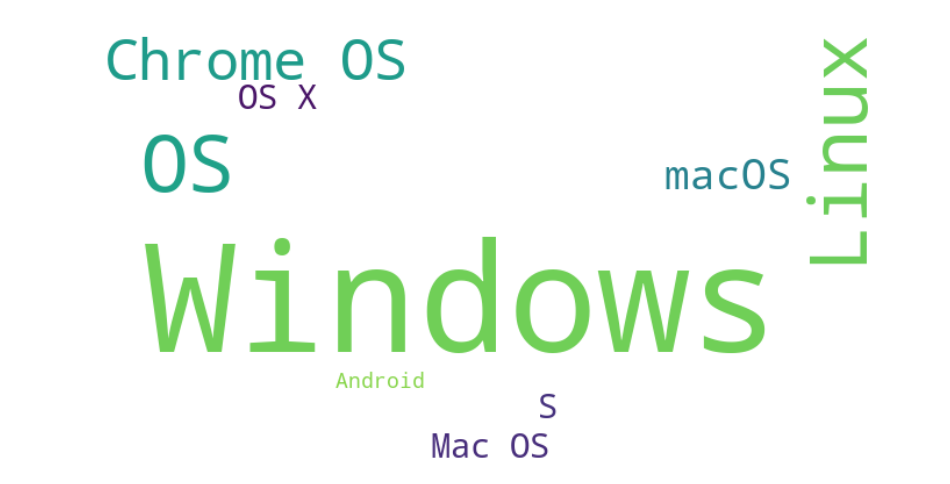

In [142]:
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      stopwords=stopwords, max_words=100, contour_width=3,
                      contour_color='steelblue').generate(text6)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Converting categorical to numerical

In [143]:
le = preprocessing.LabelEncoder()

In [144]:
categorical_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        categorical_cols.append(col)

In [145]:
print('Categorical columns:', categorical_cols)

Categorical columns: ['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys']


In [146]:
col_list = ['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys']

In [147]:
for i in col_list:
    df[i] = le.fit_transform(df[i])

In [148]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
0,1,4,13.3,23,65,8,4,58,8,1.37,71378.6832,0,1
1,1,4,13.3,1,63,8,2,51,8,1.34,47895.5232,0,0
2,7,3,15.6,8,74,8,16,53,4,1.86,30636.0000,0,0


In [149]:
model_path = 'laptop_price_prediction_model.joblib'
encoder_path = 'laptop_price_prediction_encoder.joblib'

# Train test split

In [150]:
X = df.drop('Price', axis = 1)
y = df['Price']

In [151]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.45)

# Decision tree begins

In [152]:
clf = DecisionTreeRegressor(min_samples_split=250)

In [153]:
clf = clf.fit(X_train, y_train)

In [154]:
clf

DecisionTreeRegressor(min_samples_split=250)

[Text(0.625, 0.9, 'x[5] <= 14.0\nsquared_error = 1284378397.084\nsamples = 716\nvalue = 58640.906'),
 Text(0.5, 0.7, 'x[5] <= 7.0\nsquared_error = 687687999.034\nsamples = 595\nvalue = 48662.249'),
 Text(0.25, 0.5, 'x[4] <= 57.0\nsquared_error = 231432230.505\nsamples = 251\nvalue = 30279.525'),
 Text(0.125, 0.3, 'squared_error = 42681065.851\nsamples = 127\nvalue = 20891.226'),
 Text(0.375, 0.3, 'squared_error = 242020797.814\nsamples = 124\nvalue = 39894.96'),
 Text(0.75, 0.5, 'x[1] <= 3.5\nsquared_error = 594120578.567\nsamples = 344\nvalue = 62075.225'),
 Text(0.625, 0.3, 'x[3] <= 4.0\nsquared_error = 402765346.439\nsamples = 258\nvalue = 54876.62'),
 Text(0.5, 0.1, 'squared_error = 70931425.564\nsamples = 38\nvalue = 34092.638'),
 Text(0.75, 0.1, 'squared_error = 372580625.361\nsamples = 220\nvalue = 58466.58'),
 Text(0.875, 0.3, 'squared_error = 546347211.17\nsamples = 86\nvalue = 83671.042'),
 Text(0.75, 0.7, 'squared_error = 1321150563.204\nsamples = 121\nvalue = 107709.509')]

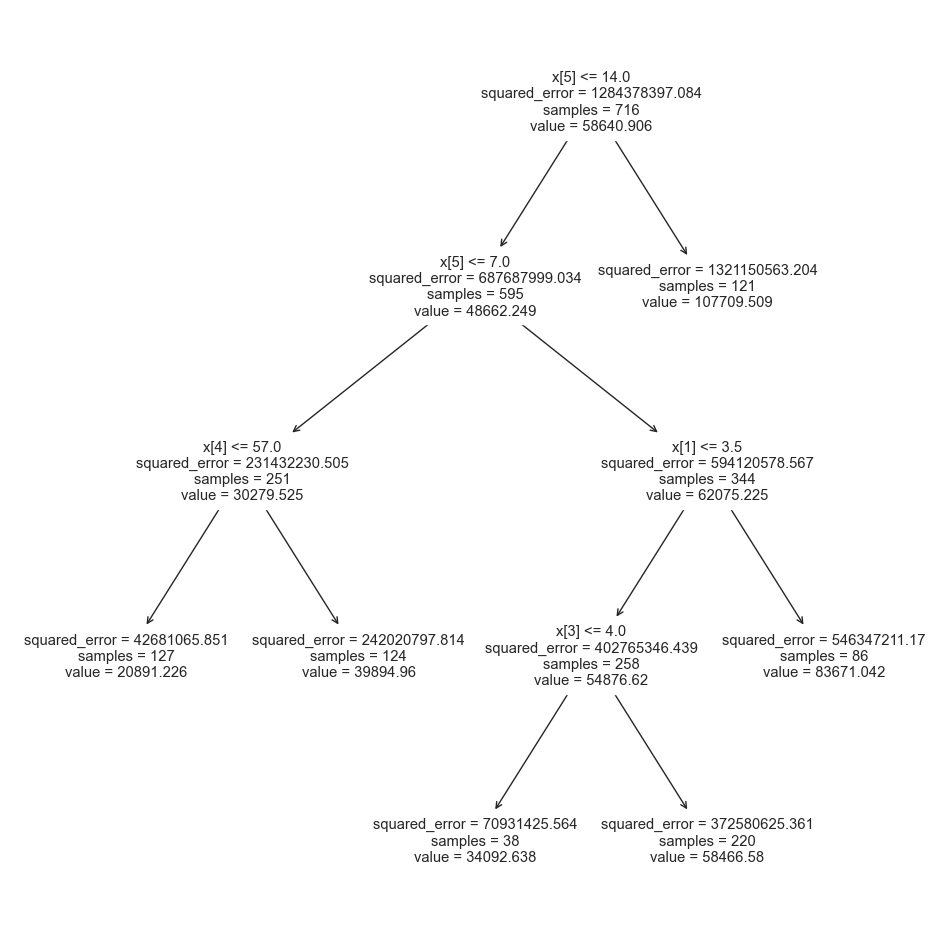

In [155]:
plt.figure(figsize = (12,12))
tree.plot_tree(clf)

# Decision tree training--------------------------------------------------------------------------------

# Looking at the MSE score of training data 

In [156]:
y_pred_train_clf = clf.predict(X_train)
mean_squared_error(y_train,y_pred_train_clf)

456619112.2221634

In [157]:
mse_train_clf = mean_squared_error(y_train,y_pred_train_clf)

# Checking the train RSME

In [158]:
import math
rmse_train_clf = math.sqrt(mse_train_clf)
print("RMSE:", rmse_train_clf)

RMSE: 21368.647880063992


# R_Squared(training data)

In [159]:
r2_score(y_train,y_pred_train_clf)

0.6444824101223363

# Decision tree testing--------------------------------------------------------------------------------

# Looking at the MSE score of testing data

In [160]:
y_pred_test_clf = clf.predict(X_test)

In [161]:
mean_squared_error(y_test,y_pred_test_clf)

666323508.6352785

In [162]:
mse_test_clf = mean_squared_error(y_test,y_pred_test_clf)

# Checking the test RSME

In [163]:
import math
rmse_test_clf = math.sqrt(mse_test_clf)
print("RMSE:", rmse_test_clf)

RMSE: 25813.242892656446


# R_Squared(Testing data)

In [164]:
r2_score(y_test,y_pred_test_clf)

0.5575085272194916

# Multiple linear regression begins

In [165]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [166]:
y_pred_train_lr = lr.predict(X_train)

In [167]:
y_pred_test_lr = lr.predict(X_test)

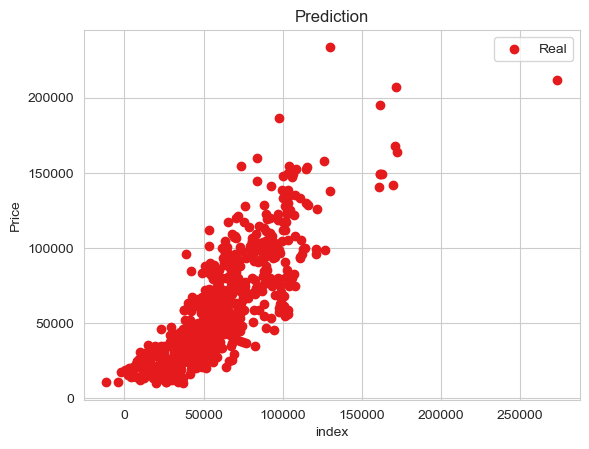

In [168]:
plt.xlabel('index')
plt.ylabel('Price')
plt.title('Prediction')
plt.scatter(y_pred_train_lr,y_train)
plt.legend(["Real", "Predicted"])

# Plotting the predictions of the real values in y_test and the predicted y_test values of the lr model.

In [169]:
x_range = [i for i in range(len(y_test))]

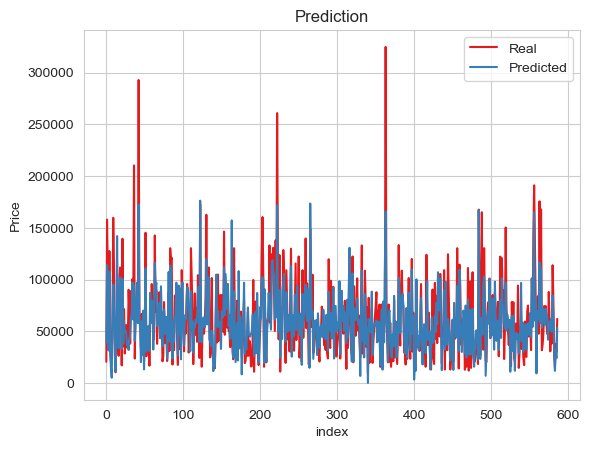

In [170]:
plt.xlabel('index')
plt.ylabel('Price')
plt.title('Prediction')

plt.plot(x_range,y_test)
plt.plot(x_range,y_pred_test_lr)

# Function add a legend  
plt.legend(["Real", "Predicted"])

# Plotting the predictions for testing data

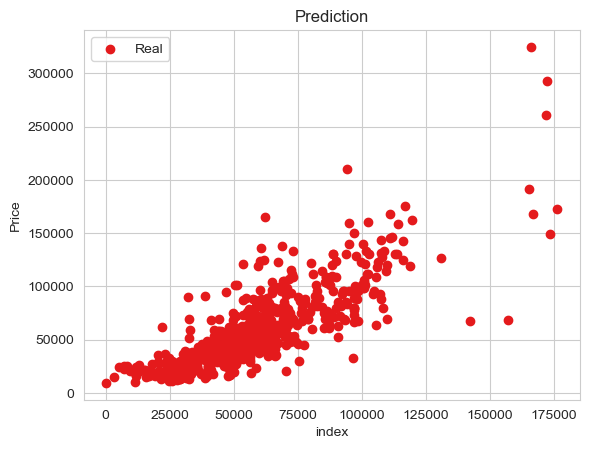

In [171]:
plt.xlabel('index')
plt.ylabel('Price')
plt.title('Prediction')

plt.scatter(y_pred_test_lr,y_test)


# Function add a legend  
plt.legend(["Real", "Predicted"])

# Multiple linear regression training---------------------------------------------------------------

# Looking at the MSE score of training data

In [172]:
mean_squared_error(y_train,y_pred_train_lr)

391573358.8093161

In [173]:
mse_train_lr=mean_squared_error(y_train,y_pred_train_lr)

# Checking the train RSME

In [174]:
import math
rmse_train_lr = math.sqrt(mse_train_lr)
print("RMSE:", rmse_train_lr)

RMSE: 19788.21262290549


# R squared(training data)

In [175]:
r2_score(y_train,y_pred_train_lr)

0.6951261717743038

# Multiple linear regression testing----------------------------------------------------------------

# Looking at the MSE score of testing data

In [176]:
mean_squared_error(y_test,y_pred_test_lr)

532263068.27574414

In [177]:
mse_test_lr=mean_squared_error(y_test,y_pred_test_lr)

# Checking the test RSME

In [178]:
# Checking the test RSMEimport math
rmse_test_lr = math.sqrt(mse_test_lr)
print("RMSE:", rmse_test_lr)

RMSE: 23070.8272126455


# R squared(testing data)

In [179]:
r2_score(y_test,y_pred_test_lr)

0.6465352551189627

In [180]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'TouchScreen', 'IPS'],
      dtype='object')

In [181]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
0,1,4,13.3,23,65,8,4,58,8,1.37,71378.6832,0,1
1,1,4,13.3,1,63,8,2,51,8,1.34,47895.5232,0,0
2,7,3,15.6,8,74,8,16,53,4,1.86,30636.0000,0,0
3,1,4,15.4,25,85,16,29,9,8,1.83,135195.3360,0,1
4,1,4,13.3,23,67,8,16,59,8,1.37,96095.8080,0,1


# Model Testing

In [182]:
def make_prediction(input_string):
    model_path = 'laptop_price_prediction_model.joblib'
    encoder_path = 'laptop_price_prediction_encoder.joblib'
    lr = joblib.load(model_path)
    enc = joblib.load(encoder_path)
    column = ['Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight']
    user_input = input_string.split(',')
    dic = {i:[z] for i,z in zip(column, user_input)}
    df_temp = pd.DataFrame(dic)
    catagorical_data = df_temp[['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys']]
    numerical_data = df_temp[['Inches', 'Ram', 'Weight']]
    enc.transform(catagorical_data)
    enc.transform(catagorical_data).toarray()
    df2 = pd.DataFrame(enc.transform(catagorical_data).toarray(), columns = enc.get_feature_names_out())
    df3 = numerical_data.join(df2)
    pred = lr.predict(df3)
    return pred